In [67]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import func, create_engine, inspect

import numpy as np
import pandas as pd
import statistics

In [68]:
OV10642_FT_Yield = pd.read_csv("Example_Data.csv")

In [69]:
OV10642_FT_Yield_col = OV10642_FT_Yield.columns
for i in range(9, len(OV10642_FT_Yield_col)):
    if "%" not in OV10642_FT_Yield_col[i]:
        del OV10642_FT_Yield[OV10642_FT_Yield_col[i]]
OV10642_FT_Yield = OV10642_FT_Yield.replace({"%":""}, regex = True)

In [70]:
columns_update = OV10642_FT_Yield.columns
bin_column = 0
for name in columns_update:
    if name != 'App (%)':
        bin_column += 1
    else:
        break
#FT Yield:
OV10642_FT_Yield['Final Yield(%)'] = pd.to_numeric(OV10642_FT_Yield['Final Yield(%)'])
final_list = ['week','Lot #','Tot Qty','Final Yield(%)']

#The other Bins:
for c in range(bin_column, len(columns_update)):
    OV10642_FT_Yield[columns_update[c]] = pd.to_numeric(OV10642_FT_Yield[columns_update[c]])
    final_list.append(columns_update[c])

In [71]:
OV10642_FT_Yield_aft = OV10642_FT_Yield[final_list]
OV10642_summary_list = OV10642_FT_Yield_aft.to_dict('list')
#OV10642_summary_list

In [72]:
import pymongo
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)
db = client.yieldDBs
collection = db.details
collection.insert_one(OV10642_summary_list)

In [73]:
readout_data = db.details.find_one()

In [74]:
transfer_data = pd.DataFrame(readout_data)
del transfer_data["_id"]

In [75]:
#del transfer_data['_id']
item_list = list(transfer_data.columns[3:])
item_list

['Final Yield(%)',
 'App (%)',
 '12io_open(%)',
 '13io_short(%)',
 '14io_op_shrt(%)',
 '15power_shrt(%)',
 '16open_hdc(%)',
 '17iout_other1(%)',
 '18iout_other2(%)',
 '19idd_int_pwdn(%)',
 '20IDDpwdn(%)',
 '21Leakage(%)',
 '22IDDA sccb(%)',
 '23IDDS sccb(%)',
 '24IDDS_INT_XSHUTDOWN(%)',
 '25IOUT_VREF(%)',
 '26LEAKAGE_L(%)',
 '27IDDA_INT_XSHUTDOWN(%)',
 '28IOUT_OTHER3(%)',
 '29SCCB_PID(%)',
 '30SCCB_WR(%)',
 '31PCLK_FREQ(%)',
 '32OFFSET_TEST()%',
 '33SCAN_Xm(%)',
 '34wake_up(%)',
 '35OTP_PRE_CUSTOMER(%)',
 '36OTP_PRE_OVT(%)',
 '37TEMPER_TEST(%)',
 '38CHAIN(%)',
 '39VSYNC_FREQ_VOLT(%)',
 '40IRE_HSYNC(%)',
 '41IRE_BURST(%)',
 '42IRE_SATURATION(%)',
 '43NTSC_OTHER1(%)',
 '44NTSC_OTHER2(%)',
 '45IOUT_OTHER4(%)',
 '46IOUT_OTHER5(%)',
 '47CHAIN_MAX(%)',
 '48SCAN_xM_MAX(%)',
 '49VOUT_VREFH(%)',
 '50VOUT_VREFN(%)',
 '51VOUT_DVDD(%)',
 '52VOUT_OTHER1(%)',
 '53VOUT_OTHER2(%)',
 '54VOUT_DVDD_STRS(%)',
 '55VOUT_VREFH_STRS(%)',
 '56VOUT_VREFN_STRS(%)',
 '57IOUT_VREF_STRS(%)',
 '58VOUT_OTHER3(%)',
 '

In [76]:
week_group = transfer_data.groupby(['week']).count()
weeks = list(week_group.index.values)
start_week = 0
if len(weeks)-9 > 0:
    update_week_list = weeks[(len(weeks)-9):]
    start_week += 1
else:
    update_week_list = weeks
    
transfer_data.loc[transfer_data['week'] != weeks[1],:]

,week,Lot #,Tot Qty,Final Yield(%),App (%),12io_open(%),13io_short(%),14io_op_shrt(%),15power_shrt(%),16open_hdc(%),...,416FOR_SensorTemperatureCheckFail(%),417GrabImage fail(%),418VoltageFai(%),419InitialCard fail or SetVideoMode fail(%),424FileError or ScriptError(%),491SpecialFail16(%),492SpecialFail17(%),493SpecialFail18(%),499SLT2_Error(%),520Reserve9(%)
0,W1922,Q03K29.1-W2,3303,90.68,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,W1922,Q03R06.1-W6,4632,90.82,0.5,0.00,0.1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,W1922,Q01F55.U2-W1,400,89.75,0.5,0.00,0.3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,W1922,Q00R47.1-W1,5368,92.75,0.4,0.10,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,W1922,Q03R00.1-W6,3363,88.17,0.4,0.30,0.1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,W1922,Q03P92.1-W2,1698,88.46,0.0,0.20,0.1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,W1922,Q00R47.1-W2,4970,88.89,0.0,0.40,0.1,0.0,0.2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,W1922,Q03R00.1-W7,3756,84.37,0.3,0.10,0.2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,W1922,Q03R06.1-W5,410,90.24,0.5,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,W1922,QVM134.1-W4,395,82.78,0.3,0.80,0.0,0.0,0.3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
yield_dict = {}
transfer_data['sum'] = transfer_data['Tot Qty'] * transfer_data['12io_open(%)']
transfer_data_gp = transfer_data.groupby(['week']).sum()
week_len = len(transfer_data_gp.index.values.tolist())
if week_len > 9:
    transfer_data_gp = transfer_data_gp[(week_len - 9):]
    
yield_dict['12io_open(%)'] = transfer_data_gp['sum'].tolist()
yield_dict['total_die'] = transfer_data_gp['Tot Qty'].tolist()
yield_dict['week'] = transfer_data_gp.index.values.tolist()
FT_Yield = pd.DataFrame(yield_dict)
FT_Yield['12io_open(%)'] = FT_Yield['12io_open(%)'] / FT_Yield['total_die']
yield_dict['12io_open(%)'] = FT_Yield['12io_open(%)'].tolist()

In [78]:
transfer_data_gp.head()

,Tot Qty,Final Yield(%),App (%),12io_open(%),13io_short(%),14io_op_shrt(%),15power_shrt(%),16open_hdc(%),17iout_other1(%),18iout_other2(%),...,417GrabImage fail(%),418VoltageFai(%),419InitialCard fail or SetVideoMode fail(%),424FileError or ScriptError(%),491SpecialFail16(%),492SpecialFail17(%),493SpecialFail18(%),499SLT2_Error(%),520Reserve9(%),sum
week,,,,,,,,,,,,,,,,,,,,,
W1922,29489,1149.46,4.8,1.9,1.5,0.0,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4564.9
W1923,16084,361.96,1.6,1.3,0.4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5322.8
W1924,46243,999.11,3.0,1.1,1.4,0.0,0.2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4237.9
W1925,75475,1630.84,7.1,1.4,2.8,0.0,0.6,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6523.8
W1926,121750,2373.90,6.3,1.6,3.8,0.0,0.1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7236.1


In [79]:
total_die = transfer_data['Tot Qty'].sum()
item_fr_dict = {}

#FT Yield:
transfer_data['sumproduct'] = transfer_data['Tot Qty'] * transfer_data['Final Yield(%)']
item_fr_dict['Final Yield(%)'] = transfer_data['sumproduct'].sum() / total_die

#The other Bins:
for c in range(bin_column, len(columns_update)):
    transfer_data['sumproduct'] = transfer_data['Tot Qty'] * transfer_data[columns_update[c]]
    item_fr_dict[columns_update[c]] = transfer_data['sumproduct'].sum() / total_die
del transfer_data['sumproduct']
#item_fr_dict

In [99]:
item_fr_df = pd.DataFrame(item_fr_dict, index=[0])
item_fr_df = item_fr_df.T
item_fr_df = item_fr_df.rename(columns = {0:'Performance'})
item_fr_df = item_fr_df.reset_index(drop = False).rename(columns = {'index': 'FT_Item'})
FT_list_all = item_fr_df['FT_Item'].tolist()
index_stop = 0
for item in FT_list_all:
    if item != '96OTHERS1(%)':
        index_stop += 1
    else:
        break
FT_summary_df = item_fr_df[0:index_stop].sort_values('Performance', ascending = False)
FT_list = list(FT_summary_df['FT_Item'][:11])
#FT_top10_df = FT_summary_df[:11].reset_index(drop=True)
FT_list.remove('App (%)')
FT_list

['Final Yield(%)',
 '13io_short(%)',
 '21Leakage(%)',
 '90MBIST_RESULT2_MAX(%)',
 '12io_open(%)',
 '36OTP_PRE_OVT(%)',
 '23IDDS sccb(%)',
 '20IDDpwdn(%)',
 '91MBIST_RESULT3_MAX(%)',
 '30SCCB_WR(%)']

In [81]:
index_start= 0
for item in FT_list_all:
    if item != '101SpecialPASS1(%)':
        index_start += 1
    else:
        break
SLT_summary_df = item_fr_df[index_start:].sort_values('Performance', ascending = False)
SLT_summary_df = SLT_summary_df.rename(columns = {'FT_Item':'SLT_Item'})
SLT_list = list(SLT_summary_df['SLT_Item'][:10])
#SLT_top10_df = SLT_summary_df[:10].reset_index(drop=True)
SLT_list

['305BRIGHT_DEAD_OR_WHITE_PIXEL_FOR_YUV_MJPG(%)',
 '315DARK_DEFECT_SLIGHT_PIXEL_FOR_ANALOG(%)',
 '225COLOR_FIDELITY(%)',
 '255SHADING_FOR_YUV_MJPG(%)',
 '354DARK_DEAD_CLUSTER_FOR_ANALOG(%)',
 '314DARK_DEFECT_SLIGHT_PIXEL_FOR_YUV_MJPG(%)',
 '325BRIGHT_CLUSTER_FOR_SMALL_LOW(%)',
 '355Reserve8(%)',
 '215LINE_NOISE(%)',
 '254SHADING_FOR_RAW(%)']

In [97]:
total_items = FT_list + SLT_list
yield_dict = {}
for item in total_items:
    transfer_data['sum'] = transfer_data['Tot Qty'] * transfer_data[item]
    transfer_data_gp = transfer_data.groupby(['week']).sum()
    yield_dict[item] = transfer_data_gp['sum'].tolist()
    yield_dict['total_die'] = transfer_data_gp['Tot Qty'].tolist()
    yield_dict['week'] = transfer_data_gp.index.values.tolist()
    FT_Yield = pd.DataFrame(yield_dict)
    FT_Yield[item] = FT_Yield[item] / FT_Yield['total_die']
    yield_dict[item] = FT_Yield[item].tolist()

yield_WeeklyAvg = pd.DataFrame(yield_dict).set_index('week')
loss_WeeklyAvg = yield_WeeklyAvg.T[2:]

loss_dict = {}
item_list = []
fail_list = []
loss_Weekly = loss_WeeklyAvg.to_dict()
for key,value in loss_Weekly['W1923'].items():
    item_list.append(key)
    fail_list.append(value)
loss_dict['item'] = item_list
loss_dict['fail'] = fail_list
loss_dict

{'item': ['App (%)',
  '13io_short(%)',
  '21Leakage(%)',
  '90MBIST_RESULT2_MAX(%)',
  '12io_open(%)',
  '36OTP_PRE_OVT(%)',
  '23IDDS sccb(%)',
  '20IDDpwdn(%)',
  '91MBIST_RESULT3_MAX(%)',
  '30SCCB_WR(%)',
  '305BRIGHT_DEAD_OR_WHITE_PIXEL_FOR_YUV_MJPG(%)',
  '315DARK_DEFECT_SLIGHT_PIXEL_FOR_ANALOG(%)',
  '225COLOR_FIDELITY(%)',
  '255SHADING_FOR_YUV_MJPG(%)',
  '354DARK_DEAD_CLUSTER_FOR_ANALOG(%)',
  '314DARK_DEFECT_SLIGHT_PIXEL_FOR_YUV_MJPG(%)',
  '325BRIGHT_CLUSTER_FOR_SMALL_LOW(%)',
  '355Reserve8(%)',
  '215LINE_NOISE(%)',
  '254SHADING_FOR_RAW(%)'],
 'fail': [0.38829271325540904,
  0.09740736135289729,
  0.0,
  0.03042775428997762,
  0.33093757771698584,
  0.06735886595374285,
  0.04408107435961204,
  0.0,
  0.03042775428997762,
  0.05136160159164388,
  1.7127455856752054,
  0.8639766227306641,
  0.588031584183039,
  1.0838535190251182,
  0.7392626212384978,
  0.20949390698831133,
  0.31909972643620993,
  0.42536060681422533,
  0.3258704302412335,
  0.1767222084058692]}

In [17]:
#Yield/loss by week:
week_list = ['week']
first_list = week_list + FT_list + SLT_list
yield_weekly = transfer_data.loc[:, first_list]
yield_WeeklyAvg = yield_weekly.groupby(['week']).mean()

In [22]:
first_df = yield_WeeklyAvg.reset_index(drop=False)
qty_weekly = transfer_data.loc[:, ['week','Tot Qty']]
qty_WeeklySum = qty_weekly.groupby(['week']).sum()
first_df['Tot Qty'] =  list(qty_WeeklySum['Tot Qty'])
first_df.head()

,week,Final Yield(%),App (%),13io_short(%),21Leakage(%),90MBIST_RESULT2_MAX(%),12io_open(%),36OTP_PRE_OVT(%),23IDDS sccb(%),20IDDpwdn(%),...,315DARK_DEFECT_SLIGHT_PIXEL_FOR_ANALOG(%),225COLOR_FIDELITY(%),255SHADING_FOR_YUV_MJPG(%),354DARK_DEAD_CLUSTER_FOR_ANALOG(%),314DARK_DEFECT_SLIGHT_PIXEL_FOR_YUV_MJPG(%),325BRIGHT_CLUSTER_FOR_SMALL_LOW(%),355Reserve8(%),215LINE_NOISE(%),254SHADING_FOR_RAW(%),Tot Qty
0,W1922,88.420000,0.369231,0.115385,0.000000,0.246154,0.146154,0.146154,0.084615,0.015385,...,0.869231,0.553846,0.923077,0.453846,0.538462,0.330769,0.776923,0.253846,0.253846,29489
1,W1923,90.490000,0.400000,0.100000,0.000000,0.025000,0.325000,0.075000,0.050000,0.000000,...,0.825000,0.600000,1.100000,0.750000,0.200000,0.325000,0.425000,0.325000,0.175000,16084
2,W1924,90.828182,0.272727,0.127273,0.100000,0.090909,0.100000,0.100000,0.045455,0.000000,...,0.754545,0.681818,0.554545,0.681818,0.472727,0.563636,0.600000,0.436364,0.145455,46243
3,W1925,90.602222,0.394444,0.155556,0.105556,0.166667,0.077778,0.033333,0.066667,0.100000,...,0.838889,0.633333,0.738889,0.611111,0.622222,0.694444,0.483333,0.327778,0.288889,75475
4,W1926,91.303846,0.242308,0.146154,0.096154,0.165385,0.061538,0.080769,0.042308,0.023077,...,0.815385,0.719231,0.588462,0.592308,0.650000,0.519231,0.430769,0.288462,0.273077,121750


In [18]:
yield_WeeklyAvg = yield_WeeklyAvg.T
loss_WeeklyAvg = yield_WeeklyAvg.drop("Final Yield(%)")
loss_WeeklyAvg.head()

week,W1922,W1923,W1924,W1925,W1926,W1927,W1928,W1929,W1930
App (%),0.369231,0.400,0.272727,0.394444,0.242308,0.116667,0.178261,0.219355,0.248077
13io_short(%),0.115385,0.100,0.127273,0.155556,0.146154,0.133333,0.134783,0.370968,0.292308
21Leakage(%),0.000000,0.000,0.100000,0.105556,0.096154,0.122222,0.108696,0.283871,0.221154
90MBIST_RESULT2_MAX(%),0.246154,0.025,0.090909,0.166667,0.165385,0.105556,0.108696,0.119355,0.121154
12io_open(%),0.146154,0.325,0.100000,0.077778,0.061538,0.107778,0.088261,0.105484,0.146923


In [19]:
loss_dict = {}
item_list = []
fail_list = []
loss_Weekly = loss_WeeklyAvg.to_dict()
for key,value in loss_Weekly['W1923'].items():
    item_list.append(key)
    fail_list.append(value)
loss_dict['item'] = item_list
loss_dict['fail'] = fail_list
loss_dict

{'item': ['App (%)',
  '13io_short(%)',
  '21Leakage(%)',
  '90MBIST_RESULT2_MAX(%)',
  '12io_open(%)',
  '36OTP_PRE_OVT(%)',
  '23IDDS sccb(%)',
  '20IDDpwdn(%)',
  '91MBIST_RESULT3_MAX(%)',
  '30SCCB_WR(%)',
  '305BRIGHT_DEAD_OR_WHITE_PIXEL_FOR_YUV_MJPG(%)',
  '315DARK_DEFECT_SLIGHT_PIXEL_FOR_ANALOG(%)',
  '225COLOR_FIDELITY(%)',
  '255SHADING_FOR_YUV_MJPG(%)',
  '354DARK_DEAD_CLUSTER_FOR_ANALOG(%)',
  '314DARK_DEFECT_SLIGHT_PIXEL_FOR_YUV_MJPG(%)',
  '325BRIGHT_CLUSTER_FOR_SMALL_LOW(%)',
  '355Reserve8(%)',
  '215LINE_NOISE(%)',
  '254SHADING_FOR_RAW(%)'],
 'fail': [0.39999999999999997,
  0.1,
  0.0,
  0.025,
  0.325,
  0.07500000000000001,
  0.05,
  0.0,
  0.025,
  0.05,
  1.675,
  0.8250000000000001,
  0.6,
  1.1,
  0.75,
  0.2,
  0.325,
  0.42500000000000004,
  0.325,
  0.175]}

In [20]:
#Spec:
FT_spec_summary = {}
total_list = FT_list + SLT_list
for item in total_list:
    if item == 'Final Yield(%)':
        FT_spec_summary[item] = statistics.median(transfer_data[item])\
        - (4 * statistics.stdev(transfer_data[item]))
    else:
        FT_spec_summary[item] = statistics.median(transfer_data[item])\
        + (4 * statistics.stdev(transfer_data[item]))
        
FT_spec_summary

{'Final Yield(%)': 79.73548719082547,
 'App (%)': 1.2896074406284799,
 '13io_short(%)': 3.00833767780537,
 '21Leakage(%)': 2.6771194657937984,
 '90MBIST_RESULT2_MAX(%)': 0.7347877760872576,
 '12io_open(%)': 0.858828279232074,
 '36OTP_PRE_OVT(%)': 1.6453794938257407,
 '23IDDS sccb(%)': 0.5498641666622524,
 '20IDDpwdn(%)': 2.035017360300454,
 '91MBIST_RESULT3_MAX(%)': 0.23982376225888957,
 '30SCCB_WR(%)': 0.40912664956540706,
 '305BRIGHT_DEAD_OR_WHITE_PIXEL_FOR_YUV_MJPG(%)': 2.612814997938712,
 '315DARK_DEFECT_SLIGHT_PIXEL_FOR_ANALOG(%)': 2.1625414121954867,
 '225COLOR_FIDELITY(%)': 2.1602996760609496,
 '255SHADING_FOR_YUV_MJPG(%)': 2.6302381843753353,
 '354DARK_DEAD_CLUSTER_FOR_ANALOG(%)': 1.8030590696492883,
 '314DARK_DEFECT_SLIGHT_PIXEL_FOR_YUV_MJPG(%)': 2.405699402987616,
 '325BRIGHT_CLUSTER_FOR_SMALL_LOW(%)': 1.8805238693503832,
 '355Reserve8(%)': 1.636703641716922,
 '215LINE_NOISE(%)': 1.4166894332910391,
 '254SHADING_FOR_RAW(%)': 1.0755149490185747}

In [21]:
#FT/SLT item performances:
FT_item_list = []
FT_loss_list = []
for key,value in FT_spec_summary.items():
    FT_item_list.append(key)
    FT_loss_list.append(value)

In [25]:
transfer_data.head()

,week,Lot #,Tot Qty,Final Yield(%),App (%),12io_open(%),13io_short(%),14io_op_shrt(%),15power_shrt(%),16open_hdc(%),...,417GrabImage fail(%),418VoltageFai(%),419InitialCard fail or SetVideoMode fail(%),424FileError or ScriptError(%),491SpecialFail16(%),492SpecialFail17(%),493SpecialFail18(%),499SLT2_Error(%),520Reserve9(%),sum
0,W1922,Q03K29.1-W2,3303,90.68,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,W1922,Q03R06.1-W6,4632,90.82,0.5,0.0,0.1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,W1922,Q01F55.U2-W1,400,89.75,0.5,0.0,0.3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,W1922,Q00R47.1-W1,5368,92.75,0.4,0.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,536.8
4,W1922,Q03R00.1-W6,3363,88.17,0.4,0.3,0.1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1008.9


In [23]:
#FT weekly bad lots:
FT_lot_summary = {}
for i in range(0, len(FT_item_list)):
    if FT_item_list[i] == 'Final Yield(%)':
        FT_specific = transfer_data.loc[:,['Lot #',FT_item_list[i]]]
        FT_specific = FT_specific.loc[FT_specific[FT_item_list[i]] < FT_loss_list[i],:]
        FT_lot_summary[FT_item_list[i]] = list(FT_specific['Lot #'])
    else:
        FT_specific = transfer_data.loc[:,['Lot #',FT_item_list[i]]]
        FT_specific = FT_specific.loc[FT_specific[FT_item_list[i]] > FT_loss_list[i],:]
        FT_lot_summary[FT_item_list[i]] = list(FT_specific['Lot #'])
        
FT_lot_summary

{'Final Yield(%)': ['Q01T26.1-W5'],
 'App (%)': ['Q01M85.1-W2', 'Q05S43.1-W2', 'QSY655.U1-W2'],
 '13io_short(%)': ['Q01T23.1-W1', 'Q01T26.1-W5'],
 '21Leakage(%)': ['Q01T23.1-W1', 'Q01T26.1-W5'],
 '90MBIST_RESULT2_MAX(%)': ['QVM134.1-W4', 'QVK376.1-W3'],
 '12io_open(%)': ['Q01T23.1-W2', 'Q01F52.U3-W1', 'Q01T26.1-W5'],
 '36OTP_PRE_OVT(%)': ['Q01T23.1-W1', 'Q01T26.1-W5'],
 '23IDDS sccb(%)': ['QVM134.1-W4',
  'Q01T23.1-W2',
  'Q01T23.1-W1',
  'Q01T26.1-W5'],
 '20IDDpwdn(%)': ['QVM135.1-W3'],
 '91MBIST_RESULT3_MAX(%)': ['Q01F55.U2-W1', 'Q08H89.U1-W1'],
 '30SCCB_WR(%)': ['Q03R06.1-W5',
  'QSW247.U6-W1',
  'Q03R00.U3-W1',
  'Q08W40.1-W2'],
 '305BRIGHT_DEAD_OR_WHITE_PIXEL_FOR_YUV_MJPG(%)': ['Q00R47.1-W2'],
 '315DARK_DEFECT_SLIGHT_PIXEL_FOR_ANALOG(%)': [],
 '225COLOR_FIDELITY(%)': [],
 '255SHADING_FOR_YUV_MJPG(%)': ['Q08H94.1-W3', 'Q08H94.4-W1'],
 '354DARK_DEAD_CLUSTER_FOR_ANALOG(%)': [],
 '314DARK_DEFECT_SLIGHT_PIXEL_FOR_YUV_MJPG(%)': ['Q01F55.U2-W1',
  'Q01F54.1-W8'],
 '325BRIGHT_CLUSTER_FOR_

# Create a Deep Learning Model

In [26]:
import tensorflow.keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dense, Dropout, LSTM, Activation
from pandas import Series
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import backend
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

Using TensorFlow backend.


In [117]:
yield_training = transfer_data["Final Yield(%)"].values.reshape(-1,1)
X_scaler = MinMaxScaler().fit(yield_training)
yield_training_scaled = X_scaler.transform(yield_training)

X_train = []
y_train = []

for i in range(3,len(yield_training)-96):
    X_train.append(yield_training_scaled[i-3 : i])
    y_train.append(yield_training_scaled[i])
    
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape, y_train.shape)

(97, 3, 1) (97, 1)


In [118]:
X_test = []
y_test = []

for i in range(175, len(yield_training)):
    X_test.append(yield_training_scaled[i-3 : i])
    y_test.append(yield_training_scaled[i])
X_test, y_test = np.array(X_test), np.array(y_test)
print(X_test.shape, y_test.shape)

(21, 3, 1) (21, 1)


## Quantify our Trained Model

In [135]:
model = Sequential()

model.add(LSTM(10, return_sequences=True, input_shape=(X_train.shape[1], 1)))

model.add(LSTM(24, return_sequences=False))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='rmsprop')

model.summary()

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 21, batch_size = 10)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, 3, 10)             480       
_________________________________________________________________
lstm_25 (LSTM)               (None, 24)                3360      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 25        
Total params: 3,865
Trainable params: 3,865
Non-trainable params: 0
_________________________________________________________________
Train on 97 samples, validate on 21 samples
Epoch 1/21
97/97 [==============================] - 3s 32ms/sample - loss: 0.6330 - val_loss: 0.4342
Epoch 2/21
97/97 [==============================] - 0s 988us/sample - loss: 0.4091 - val_loss: 0.2600
Epoch 3/21
97/97 [==============================] - 0s 1ms/sample - loss: 0.2178 - val_loss: 0.1192
Epoch 4/21
97/97 [================

In [136]:
pred = model.predict(X_test)
yield_prediction = X_scaler.inverse_transform(pred)
yield_real = X_scaler.inverse_transform(y_test)

model_loss = model.evaluate(X_test, y_test, verbose=2)

print(yield_prediction[18], yield_real[18])
print(model_loss)

21/21 - 0s - loss: 0.0426
[90.33206] [82.78]
0.0426291823387146


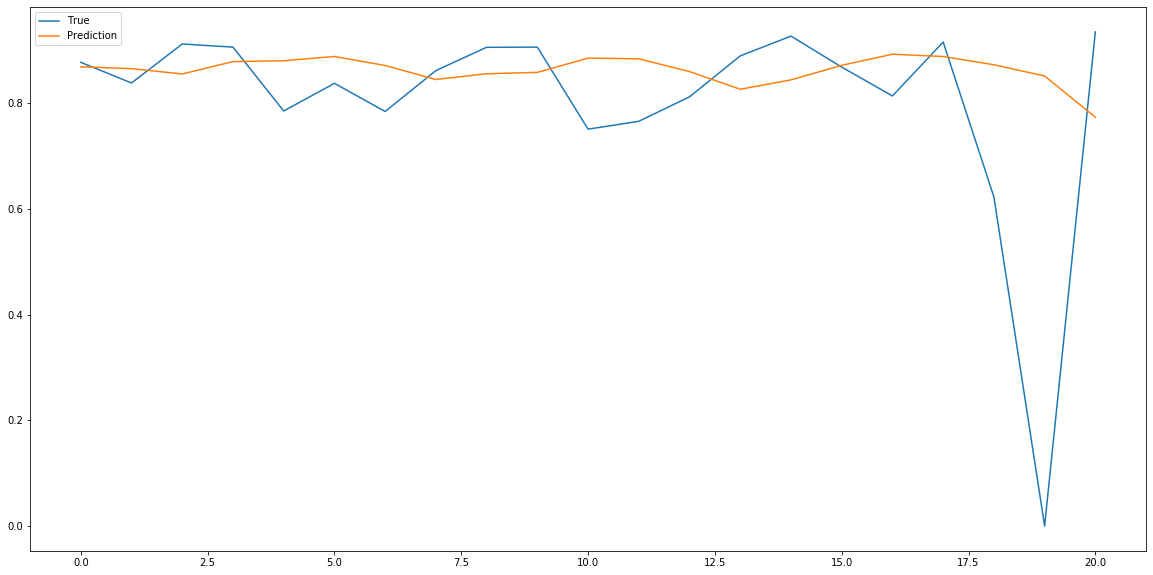

In [137]:
import matplotlib.pyplot as plt


fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()


## Make Predictions

C:\Users\eugene.chu1\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\sklearn\preprocessing\label.py:273: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicted classes: [8 8 8 8 8]
Actual Labels: [1547, 1238, 1666, 1645, 1953]
